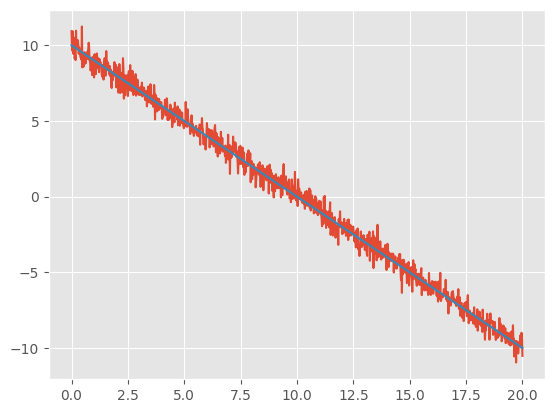

In [9]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

num_samples     = 1000
distance_range  = 20
distances       = np.linspace(0, distance_range, num_samples)
noise           = np.random.normal(loc=0, scale=1/2, size=num_samples)

y       = - distances + 10
noisy_y = y + noise

plt.plot(distances, noisy_y, zorder=1)
plt.plot(distances, y, zorder=2)
plt.show()

# Perception

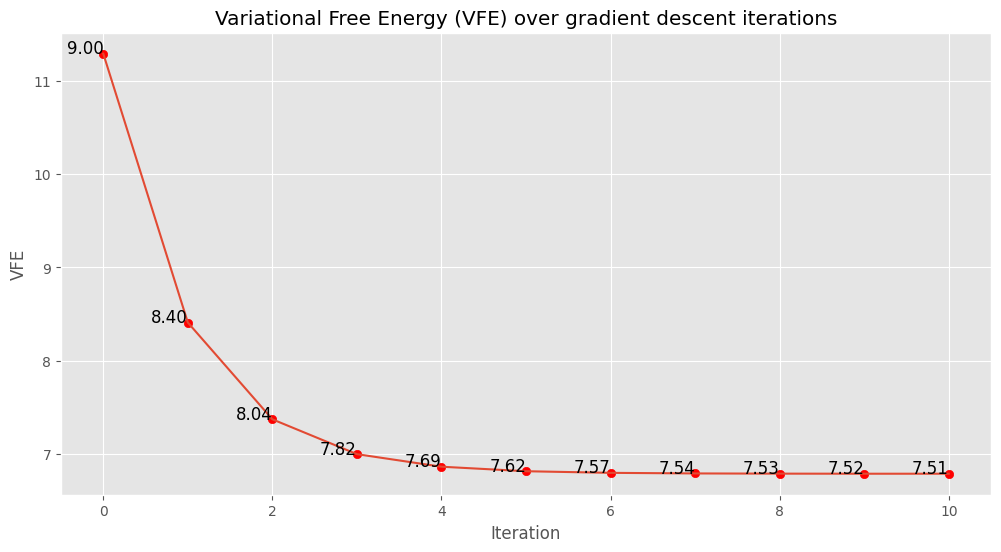

In [10]:
def f(x):
    return - x + 10

def df(x):
    return np.full_like(x, -1)

# Parameters
inference_iterations = 10
prior = 9
sigma_y = 1/2
sigma_x = 1/2
y_sample = 4

# Initialize lists for phi estimates and variational free energies (VFEs)
phi_estimates = [prior]

vfes = []

# Iteratively update phi estimates and calculate VFEs
for i in range(inference_iterations):

    error_y = y_sample - f(phi_estimates[-1])
    error_x = phi_estimates[-1] - prior

    vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

    phi_estimates.append(phi_estimates[-1] + 0.1 * ((error_y / sigma_y) * df(phi_estimates[-1]) - error_x / sigma_x))

vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

# Plot the VFE plot
plt.figure(figsize=(12, 6))
plt.plot(vfes, label='VFE')
plt.scatter(range(len(vfes)), vfes, color='red')

# Add labels to points in the VFE plot with phi_estimates rounded to 2 decimal places
for i, (x, vfe) in enumerate(zip(range(len(vfes)), vfes)):
    plt.text(x, vfe, f'{phi_estimates[i]:.2f}', fontsize=12, ha='right')

plt.title("Variational Free Energy (VFE) over gradient descent iterations")
plt.xlabel("Iteration")
plt.ylabel("VFE")
plt.grid(True)
plt.show()


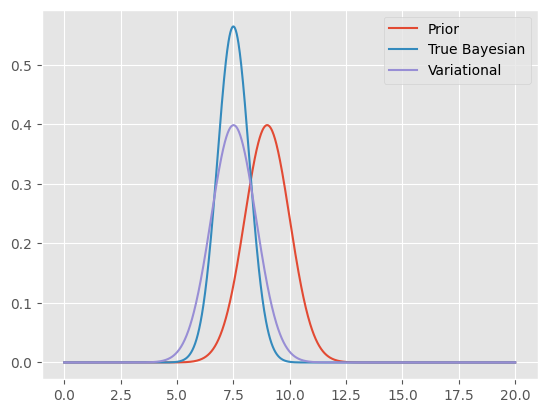

In [11]:
phi = phi_estimates[-1]

numerator = np.multiply(norm.pdf(y_sample, loc=f(distances), scale=1), norm.pdf(distances, loc=prior, scale=1))
normalization = sum(numerator * 0.02)

plt.plot(distances, norm.pdf(distances, loc=prior, scale=1), label='Prior')
plt.plot(distances, numerator / normalization, label='True Bayesian')
plt.plot(distances, norm.pdf(distances, loc=phi, scale=1), label='Variational')

plt.legend()
plt.show()

# Learning

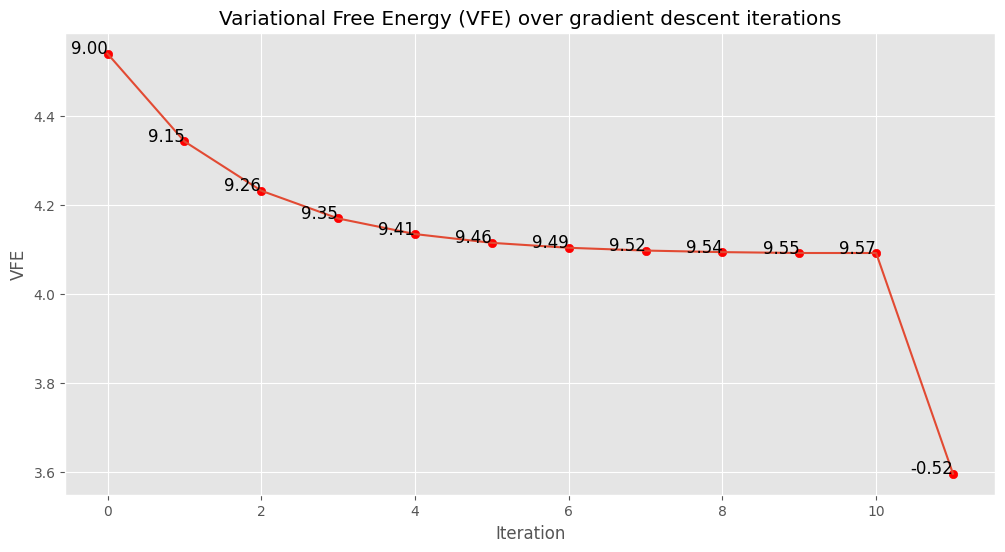

In [18]:
def f(x, theta):
    return theta * x + 10

def df_dtheta(x, theta):
    return x

def df_dx(x, theta):
    return theta

# Parameters
inference_iterations = 10
prior = 9
sigma_y = 1/2
sigma_x = 1/2
y_sample = 4

theta = -0.5
eta   = 0.01 # Learning rate

# Initialize lists for phi estimates and variational free energies (VFEs)
phi_estimates = [prior]

vfes = []

# Iteratively update phi estimates and calculate VFEs
for i in range(inference_iterations):

    error_y = y_sample - f(phi_estimates[-1], theta)
    error_x = phi_estimates[-1] - prior

    vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

    phi_estimates.append(phi_estimates[-1] + 0.1 * ((error_y / sigma_y) * df_dx(phi_estimates[-1], theta) - error_x / sigma_x))

vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

# After convergence - update theta estimate

theta = theta + 0.1 * eta * (error_y / sigma_y) * df_dtheta(phi_estimates[-1], theta)

error_y = y_sample - f(phi_estimates[-1], theta)
error_x = phi_estimates[-1] - prior

vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

phi_estimates.append(theta)

# Plot the VFE plot
plt.figure(figsize=(12, 6))
plt.plot(vfes, label='VFE')
plt.scatter(range(len(vfes)), vfes, color='red')

# Add labels to points in the VFE plot with phi_estimates rounded to 2 decimal places
for i, (x, vfe) in enumerate(zip(range(len(vfes)), vfes)):
    plt.text(x, vfe, f'{phi_estimates[i]:.2f}', fontsize=12, ha='right')

plt.title("Variational Free Energy (VFE) over gradient descent iterations")
plt.xlabel("Iteration")
plt.ylabel("VFE")
plt.grid(True)
plt.show()


# Action

In [ ]:
def f(x, theta):
    return theta * x + 10

def df_dtheta(x, theta):
    return x

def df_dx(x, theta):
    return theta

# Parameters
inference_iterations = 10
prior = 9
sigma_y = 1/2
sigma_x = 1/2
y_sample = 4

theta = -0.5
eta   = 0.01 # Learning rate

# Initialize lists for phi estimates and variational free energies (VFEs)
phi_estimates = [prior]

vfes = []

# Iteratively update phi estimates and calculate VFEs
for i in range(inference_iterations):

    error_y = y_sample - f(phi_estimates[-1], theta)
    error_x = phi_estimates[-1] - prior

    vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

    phi_estimates.append(phi_estimates[-1] + 0.1 * ((error_y / sigma_y) * df_dx(phi_estimates[-1], theta) - error_x / sigma_x))

vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

# After convergence - update theta estimate

theta = theta + 0.1 * eta * (error_y / sigma_y) * df_dtheta(phi_estimates[-1], theta)

error_y = y_sample - f(phi_estimates[-1], theta)
error_x = phi_estimates[-1] - prior

vfes.append(1 / 2 * ((error_y**2) / sigma_y + (error_x**2) / sigma_x) + np.log(2 * np.pi * sigma_y) + np.log(2 * np.pi * sigma_y))

phi_estimates.append(theta)

# Plot the VFE plot
plt.figure(figsize=(12, 6))
plt.plot(vfes, label='VFE')
plt.scatter(range(len(vfes)), vfes, color='red')

# Add labels to points in the VFE plot with phi_estimates rounded to 2 decimal places
for i, (x, vfe) in enumerate(zip(range(len(vfes)), vfes)):
    plt.text(x, vfe, f'{phi_estimates[i]:.2f}', fontsize=12, ha='right')

plt.title("Variational Free Energy (VFE) over gradient descent iterations")
plt.xlabel("Iteration")
plt.ylabel("VFE")
plt.grid(True)
plt.show()
